# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [314]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key as key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [315]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [316]:
# print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [317]:
#initialize
count = 0
name = []
lon = []
lat = []
temp = []
humidity = []
wind = []
clouds = []
country = []
dt = []

url = 'http://api.openweathermap.org/data/2.5/weather?'
for city in cities:
    params = '&units=imperial'
    query_url = f'{url}appid={key}&q={city}{params}'
    response: object = requests.get(query_url).json()
    try:
        name.append(response['name'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        count += 1
        print(f'City # {count} : {city}')
    except:
        print('N/A')

City # 1 : komsomolskiy
City # 2 : qaqortoq
City # 3 : saskylakh
City # 4 : tlaquepaque
City # 5 : bethel
City # 6 : aswan
City # 7 : port alfred
N/A
City # 8 : rikitea
City # 9 : saint-pierre
City # 10 : hilo
City # 11 : namanyere
City # 12 : victoria
City # 13 : morrovalle
City # 14 : constitucion
City # 15 : provideniya
City # 16 : albany
City # 17 : new norfolk
City # 18 : vuktyl
City # 19 : merauke
N/A
City # 20 : hermanus
City # 21 : vardo
City # 22 : xining
City # 23 : okhotsk
City # 24 : airai
City # 25 : rumphi
N/A
City # 26 : galle
City # 27 : arraial do cabo
City # 28 : ushuaia
City # 29 : omboue
City # 30 : vaini
City # 31 : rapid valley
City # 32 : los llanos de aridane
City # 33 : jonuta
City # 34 : nikolskoye
City # 35 : maldonado
City # 36 : bogota
City # 37 : mamallapuram
N/A
City # 38 : cape town
City # 39 : copiapo
City # 40 : mar del plata
City # 41 : bam
City # 42 : souillac
City # 43 : butaritari
City # 44 : punta arenas
City # 45 : saint-philippe
N/A
City # 46 : 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [318]:
#check length
print(f'# of cities {len(name)}')

#compare lists
length = len(name)
if all(len(lst) == length for lst in [lon, lat, temp, humidity, clouds, wind, country, dt]):
    print('lists are equal')
else:
    print('lists are not equal')

# of cities 551
lists are equal


In [319]:
dict = {
    'City': name,
    'Longitude': lon,
    'Latitude': lat,
    'Temperature': temp,
    'Humidity': humidity,
    'Wind': wind,
    'Cloudiness': clouds,
    'Country': country,
    'Date': dt
}

df = pd.DataFrame(data=dict)
# df

In [320]:
df.to_csv(output_data_file, index=False)
df.head()

,City,Longitude,Latitude,Temperature,Humidity,Wind,Cloudiness,Country,Date
0,Yangi Marg`ilon,71.7189,40.4272,62.60,45,4.61,25,UZ,1621118881
1,Qaqortoq,-46.0333,60.7167,50.00,25,8.05,11,GL,1621118882
2,Saskylakh,114.0833,71.9167,11.64,93,10.80,100,RU,1621118882
3,Tlaquepaque,-103.3167,20.6500,84.99,32,14.97,90,MX,1621118883
4,Bethel,-73.4140,41.3712,75.20,22,6.91,75,US,1621118883


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%.

In [321]:
df1 = df.loc[df['Humidity'] > 100]
df1

,City,Longitude,Latitude,Temperature,Humidity,Wind,Cloudiness,Country,Date


##### No cities have humidity > 100

In [322]:
#  Get the indices of cities that have humidity over 100%.

In [323]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing 'inplace=False' will make a copy of the city_data DataFrame, which we call 'clean_city_data'.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

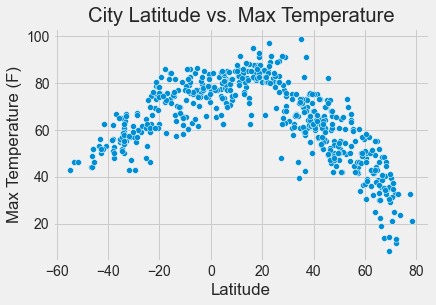

In [324]:
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

sns.scatterplot(data=df, x='Latitude', y='Temperature')

plt.savefig('output_data/latitude_vs_temperature')
plt.show()

## Latitude vs. Humidity Plot

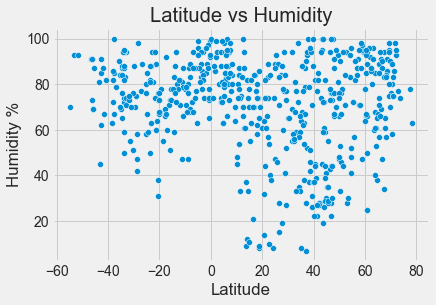

In [325]:
x = 'Latitude'
y = 'Humidity'

sns.scatterplot(data=df, x=x, y=y)
plt.title('Latitude vs Humidity')
xlabel = plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.savefig('output_data/latitude_vs_humidity')
plt.show()

## Latitude vs. Cloudiness Plot

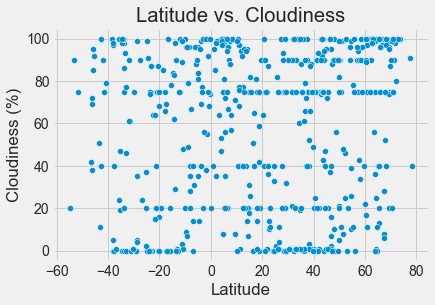

In [339]:
x = 'Latitude'
y = 'Cloudiness'

plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

sns.scatterplot(data=df, x=x, y=y)
plt.savefig('output_data/lat_vs_cloudiness')
plt.show() 

## Latitude vs. Wind Speed Plot

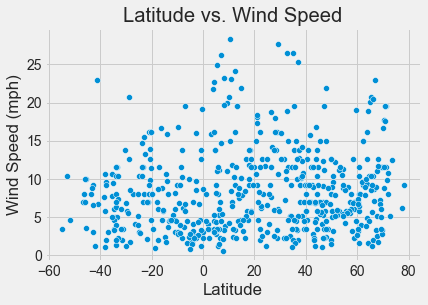

In [338]:
x = 'Latitude'
y = 'Wind'

plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

sns.scatterplot(data=df, x=x, y=y)
plt.savefig('output_data/lat_vs_windspeed')
plt.show() 

## Linear Regression

In [328]:
#filter north and south values

filt_n = (df['Latitude'] >= 0)
filt_s = (df['Latitude'] < 0)

n_hemisphere = df.loc[filt_n]
s_hemisphere = df.loc[filt_s]

def calc_linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    rvalue = round(rvalue,2)
    print(f"r-squared = {rvalue}")
    plt.style.use('fast')
    plt.xlabel("Latitude")
    sns.scatterplot(data=df, x=x, y=y)
    plt.plot(x,regress_values,color='r')
    plt.annotate(line_eq,(x.median(),y.median()-2),fontsize=16,color='w',bbox={'facecolor':'black','alpha':0.8})
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared = -0.85
None


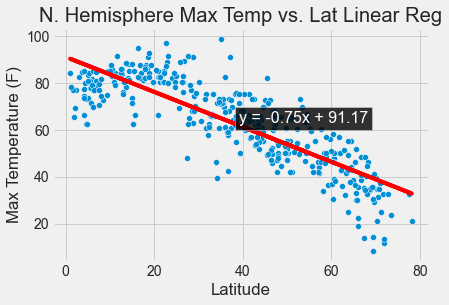

In [340]:
    plt.title("N. Hemisphere Max Temp vs. Lat Linear Reg")
    plt.ylabel('Max Temperature (F)')
    output=calc_linear_regression(x=n_hemisphere['Latitude'],y=n_hemisphere['Temperature'])
    print(output)
    plt.savefig('output_data/linregress_lat_vs_temp_north')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared = 0.79
None


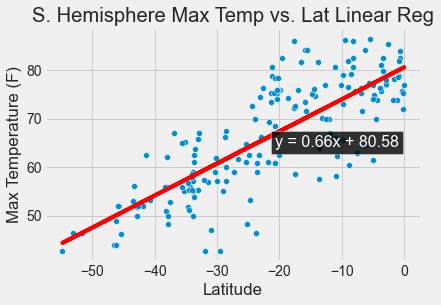

In [341]:
    plt.title("S. Hemisphere Max Temp vs. Lat Linear Reg")
    plt.ylabel('Max Temperature (F)')
    output=calc_linear_regression(x=s_hemisphere['Latitude'],y=s_hemisphere['Temperature'])
    print(output)
    plt.savefig('output_data/linregress_lat_vs_temp_south')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared = 0.02
None


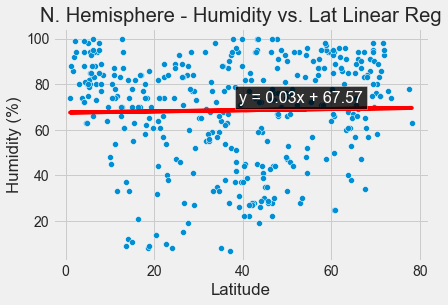

In [356]:
     plt.title("N. Hemisphere - Humidity vs. Lat Linear Reg")
     plt.ylabel('Humidity (%)')
     output=calc_linear_regression(x=n_hemisphere['Latitude'],y=n_hemisphere['Humidity'])
     print(output)
     plt.savefig('output_data/linregress_lat_vs_humidity_north')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

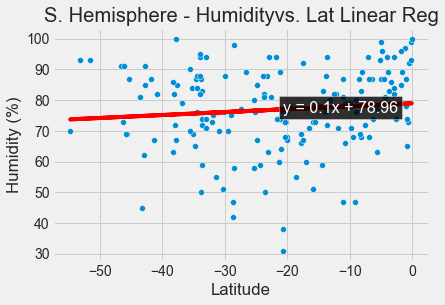

r-squared = 0.1
None


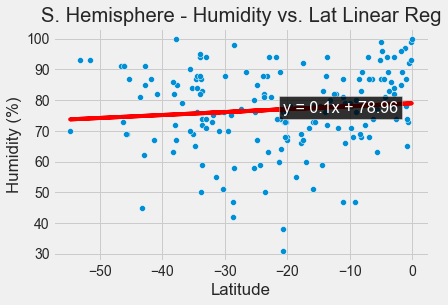

In [355]:
    plt.title("S. Hemisphere - Humidity vs. Lat Linear Reg")
    plt.ylabel('Humidity (%)')
    output=calc_linear_regression(x=s_hemisphere['Latitude'],y=s_hemisphere['Humidity'])
    print(output)
    plt.savefig('output_data/linregress_lat_vs_humidity_south')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared = 0.09
None


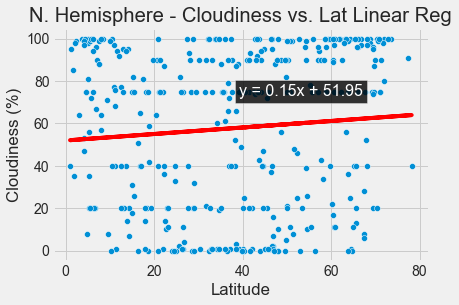

In [353]:
    plt.title("N. Hemisphere - Cloudiness vs. Lat Linear Reg")
    plt.ylabel('Cloudiness (%)')
    output=calc_linear_regression(x=n_hemisphere['Latitude'],y=n_hemisphere['Cloudiness'])
    print(output)
    plt.savefig('output_data/linregress_lat_vs_cloudiness_north')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared = 0.05
None


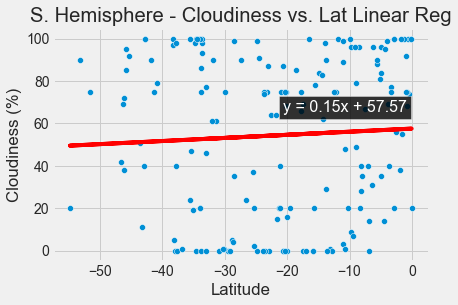

In [357]:
    plt.title("S. Hemisphere - Cloudiness vs. Lat Linear Reg")
    plt.ylabel('Cloudiness (%)')
    output=calc_linear_regression(x=s_hemisphere['Latitude'],y=s_hemisphere['Cloudiness'])
    print(output)
    plt.savefig('output_data/linregress_lat_vs_cloudiness_south')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared = -0.05
None


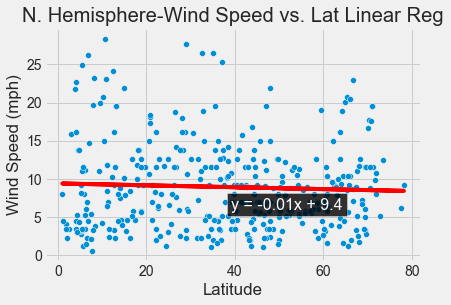

In [358]:
    plt.title("N. Hemisphere-Wind Speed vs. Lat Linear Reg")
    plt.ylabel('Wind Speed (mph)')
    output=calc_linear_regression(x=n_hemisphere['Latitude'],y=n_hemisphere['Wind'])
    print(output)
    plt.savefig('output_data/linregress_lat_vs_windspeed_north')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared = -0.07
None


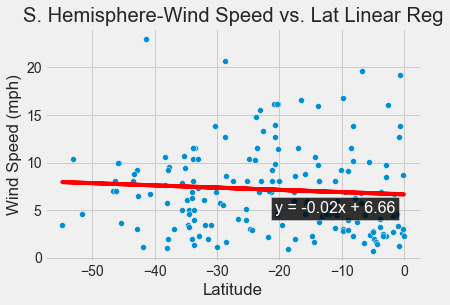

In [359]:
    plt.title("S. Hemisphere-Wind Speed vs. Lat Linear Reg")
    plt.ylabel('Wind Speed (mph)')
    output=calc_linear_regression(x=s_hemisphere['Latitude'],y=s_hemisphere['Wind'])
    print(output)
    plt.savefig('output_data/linregress_lat_vs_windspeed_south')